## KNN Algorithm For Breast Cancer Detection

### Introduction

"Begnin" and "malignant" are terms used to describe the nature and behavior of tumors or growths, particularly in the context of cancer:

1. **Benign:**
   - A benign tumor is non-cancerous and does not invade nearby tissues or spread to other parts of the body. Benign tumors tend to grow slowly, and their cells usually resemble normal cells. While they are not cancerous, they can still cause problems depending on their size and location. Benign tumors are typically considered less threatening than malignant tumors.

2. **Malignant:**
   - A malignant tumor is cancerous and has the potential to invade nearby tissues and spread to other parts of the body through the bloodstream or lymphatic system. Malignant cells are often more abnormal in appearance compared to normal cells, and they can grow rapidly. The ability to invade surrounding tissues and spread to other organs is a characteristic feature of malignancy. Malignant tumors are considered more serious and are the focus of cancer treatment.

In summary, the key distinction between benign and malignant tumors lies in their behavior and potential to cause harm:

- **Benign tumors:** Usually slow-growing, do not invade nearby tissues, and do not spread to other parts of the body.
  
- **Malignant tumors:** Can invade nearby tissues and have the potential to spread (metastasize) to other organs, making them more dangerous and requiring aggressive treatment.


##### Importing the necessary library

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

##### Readind the csv file

In [129]:
df=pd.read_csv("breast_cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [130]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [131]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


### Data Preprocessing

Here the `id` and `Unnamed: 32` column are not significant for analysis so removing them from dataframe.

In [132]:
df=df.drop(['id','Unnamed: 32'],axis=1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


##### Getting independent data/variables from dataframe 

In [133]:
X=df.drop(['diagnosis'],axis=1).values
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

##### Getting dependent variable from dataframe

In [134]:
y=df[['diagnosis']].values.ravel()
y[:5]

array(['M', 'M', 'M', 'M', 'M'], dtype=object)

##### Splitting data for training and testing

In [135]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

##### Standardization of Data

KNN is a distance based algorithm so normalizing the data for efficient model 

In [136]:
scale=StandardScaler()
scale.fit(X_train)
X_train_scaled=scale.transform(X_train)
X_test_scaled=scale.transform(X_test)

### Developing Model

Initially the value of k is assumed to be square root of size of training set which can be optimized further.

In [137]:
k=int(np.sqrt(X_train_scaled.shape[0]))
k

21

In [138]:
knn=KNeighborsClassifier(n_neighbors=k).fit(X_train_scaled,y_train)

In [139]:
knn

KNeighborsClassifier(n_neighbors=21)

### Predicting results from model

In [140]:
y_predicted=knn.predict(X_test_scaled)
y_predicted

array(['M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'M', 'M', 'M',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B'], dtype=object)

### Checking accuracy of model

In [141]:
accuracy=accuracy_score(y_test,y_predicted)
accuracy

0.956140350877193

### Optimization

checking the accuracy for the different value of k for best possible accuracy

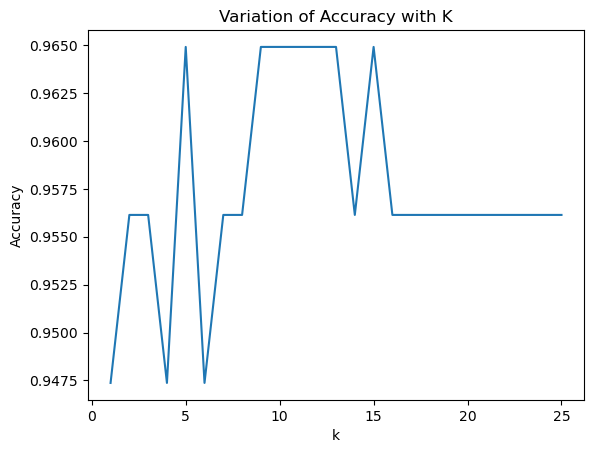

0.9649122807017544

In [142]:
accuracy_score_array=[]
for i in range(1,26):
    knn=KNeighborsClassifier(n_neighbors=i).fit(X_train_scaled,y_train)
    accuracy_score_array.append(accuracy_score(y_test,knn.predict(X_test_scaled)))
accuracy_score_array
max_accuracy=np.array(accuracy_score_array).max()

plt.plot(range(1,26),accuracy_score_array)
plt.title('Variation of Accuracy with K')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

max_accuracy

Maximum accuracy of 96.491% is found for k=5

### Deleloping best possible  model

In [143]:
knn=KNeighborsClassifier(n_neighbors=5).fit(X_train_scaled,y_train)
y_predicted_optimized=knn.predict(x_test_scaled)
y_predicted

array(['M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'M', 'M', 'M',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B'], dtype=object)

In [144]:
accuracy=accuracy_score(y_test,y_predicted_optimized)
accuracy

0.9649122807017544